# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# reading and data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.figure_factory as ff

# to display the graphs
%matplotlib inline

sns.set()

# train and test splitting
from sklearn.model_selection import train_test_split

# linear regression model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to check for multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for testing normality
import pylab
import scipy.stats as stats

# for testing homoscedasticiy
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 3/DataSets/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
df.shape

(3454, 15)

There are 3454 rows and 15 columns 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There's 4 categorical values and 11 numerical ones. One of which is a date variable.

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 33 identified brands and 4 OS systems
- Android is the most frequent OS
- Most devices are only available on 4g
- We have phones from 2013 up to 2020
- The average days of use for a phone is 674.8
- There are some weird min values for screen size, main and selfie camera mp, internal memory, and ram. We'll explore these more deeply.
- The max value for weight also seems sketchy.

In [ ]:
df.duplicated().sum()

0

There are no duplicated values

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- There are missing values in various columns

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
def hist_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Histogram and boxplot combined
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet") 
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) 
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-") 

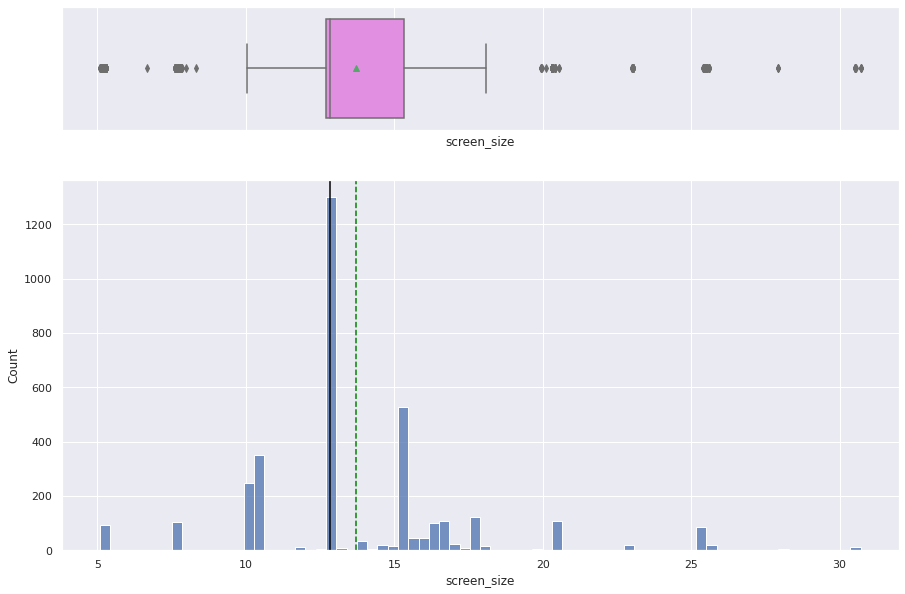

In [ ]:
hist_boxplot(df, "screen_size")

In [ ]:
df['screen_size'].median()

12.83

In [ ]:
df.loc[df['screen_size']==12.83,'screen_size'].count()

409

In [ ]:
df.screen_size.value_counts()

12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
        ... 
17.40      1
15.82      1
14.53      1
16.15      1
14.81      1
Name: screen_size, Length: 142, dtype: int64

- There are a couple of outliers on both sides that could need further investigation.
- The median screen size is 12.83cm, with 409 devices.
- The screen size with the most frequency is 12.7cm, with 575 devices.
- 37.7% of phone screens range between 12.5cm and 13cm.
- 50% of phone screens range between 12.5cm and 15.5cm.


In [ ]:
df.loc[df['screen_size']==5.08,'screen_size']

884     5.08
885     5.08
898     5.08
934     5.08
938     5.08
2533    5.08
Name: screen_size, dtype: float64

In [ ]:
df.iloc[[884, 885, 898, 934, 938, 2533]]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
884,Others,Others,5.08,no,no,1.3,0.3,128.0,0.25,820.0,80.0,2013,905,2.212660,3.041184
885,Others,Others,5.08,no,no,0.3,0.3,32.0,0.25,820.0,80.0,2013,636,1.536867,3.042139
898,Others,Others,5.08,no,no,1.3,0.3,64.0,0.25,620.0,69.0,2013,990,2.236445,3.007167
934,Others,Others,5.08,no,no,2.0,2.0,24.0,4.00,1000.0,101.0,2015,691,3.151453,4.948263
938,Others,Others,5.08,no,no,2.0,0.3,16.0,4.00,1300.0,161.0,2013,630,3.193763,4.940785
2533,Samsung,Others,5.08,no,no,8.0,2.0,16.0,4.00,800.0,75.0,2014,990,2.052841,3.057298


- After looking at the lowest outliers and doing some research, it is possible this values are real.
- We won't be editing them.


In [ ]:
df.loc[df['screen_size']==30.71,'screen_size']

388    30.71
644    30.71
653    30.71
662    30.71
Name: screen_size, dtype: float64

In [ ]:
df.iloc[[388, 644, 653, 662]]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
388,Apple,Others,30.71,yes,no,12.0,7.0,128.0,6.0,9720.0,641.0,2020,220,5.847392,6.907335
644,Apple,iOS,30.71,yes,no,12.0,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
653,Apple,iOS,30.71,yes,no,12.0,7.0,64.0,4.0,2256.0,677.0,2017,541,5.759186,6.803095
662,Apple,iOS,30.71,yes,no,8.0,1.2,32.0,4.0,3937.0,713.0,2015,572,5.558872,6.744671


- After looking at the highest outliers and doing some research, it is possible this values are real.
- We won't be editing them.


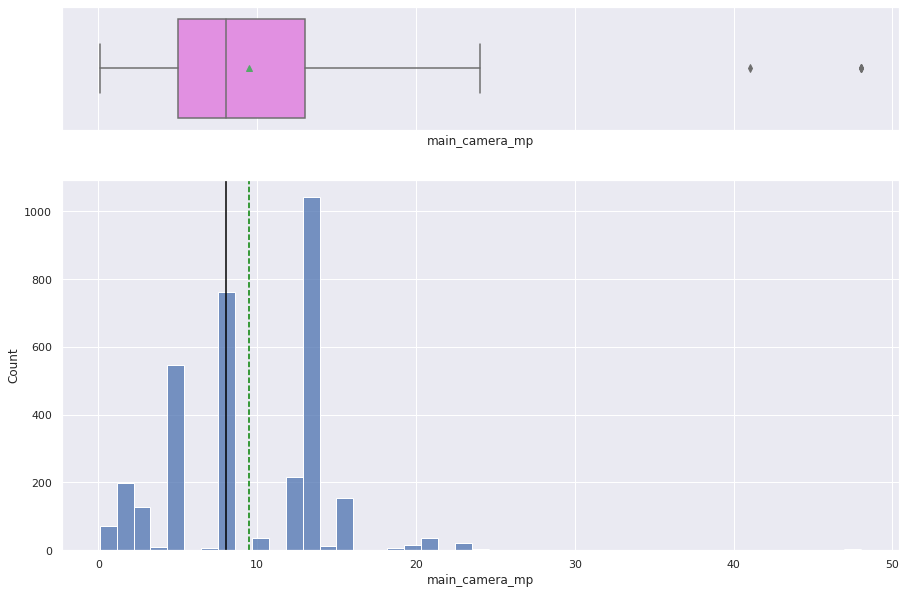

In [ ]:
hist_boxplot(df, "main_camera_mp")

- The distribution is right-skewed, with some outliers ranging between 40-50mp. These values seem real, so we won't mess with them.
- 50% 0f phones have a main camera resolution between around 5mp and around 14mp.


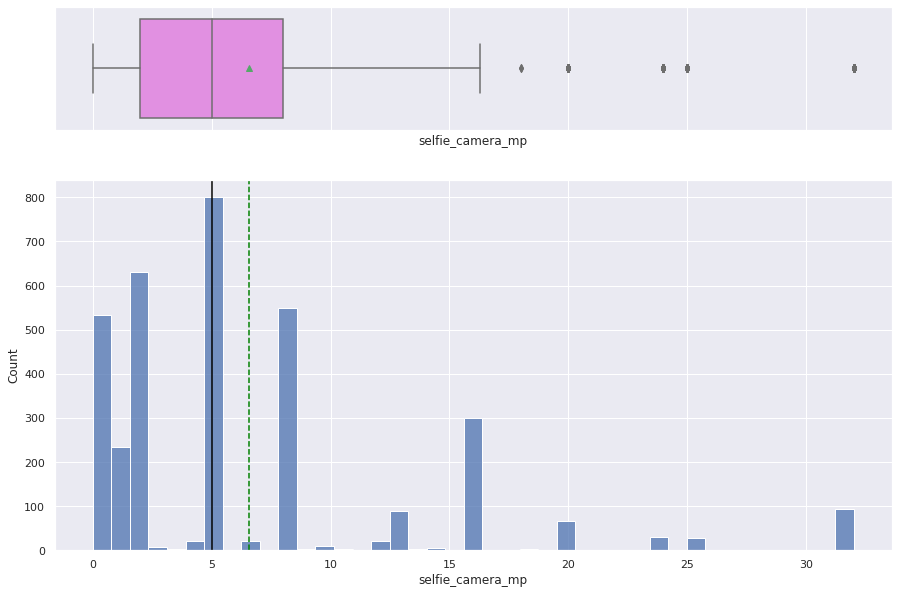

In [ ]:
hist_boxplot(df, "selfie_camera_mp")

- The distribution is right-skewed, with a couple of outliers ranging between 17.5-37.5mp. These values seem real, so we won't mess with them.
- 50% 0f phones have a selfie camera resolution between around 2mp and around 8mp.


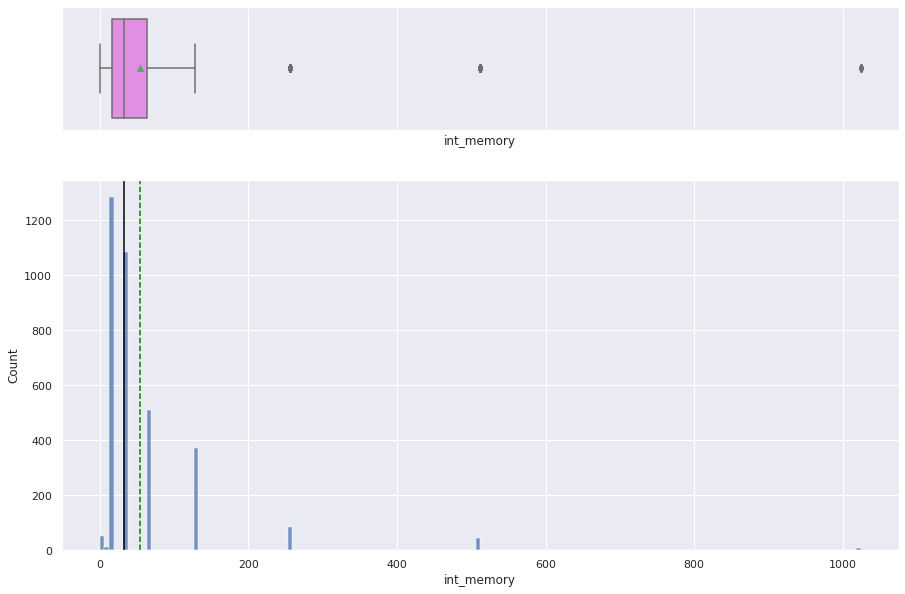

In [ ]:
hist_boxplot(df, "int_memory")

In [ ]:
df['int_memory'].max()

1024.0

In [ ]:
df.loc[df['int_memory']==1024,'int_memory']

644     1024.0
645     1024.0
772     1024.0
791     1024.0
1468    1024.0
1940    1024.0
2251    1024.0
2355    1024.0
Name: int_memory, dtype: float64

In [ ]:
df.iloc[[644, 645, 772, 791, 1468, 1940, 2251, 2355]]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
644,Apple,iOS,30.71,yes,no,12.00,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.00,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
772,Asus,Android,12.70,no,no,8.00,0.3,1024.0,4.0,2500.0,160.0,2014,860,3.523120,4.594413
791,Asus,Android,10.34,no,no,13.00,1.2,1024.0,4.0,1820.0,126.0,2014,772,5.494953,5.555012
1468,Lava,Android,10.16,no,no,2.00,0.3,1024.0,4.0,1400.0,113.0,2013,595,2.978077,3.934958
1940,Micromax,Android,10.08,no,no,3.15,0.3,1024.0,4.0,1450.0,118.0,2013,836,3.437208,4.503912
2251,Others,Android,12.70,no,no,5.00,0.3,1024.0,4.0,2200.0,170.0,2013,584,4.070905,5.135798
2355,Samsung,Android,15.34,yes,no,12.00,9.0,1024.0,4.0,4100.0,175.0,2019,291,5.569718,6.957269


- 50% of phones have an internal memory between around 20GB and around 60GB.
- Looking at the outliers, seems a little odd that phones released before 2018 have an internal memory of more than 1000GB. We'll have to deal with these values.

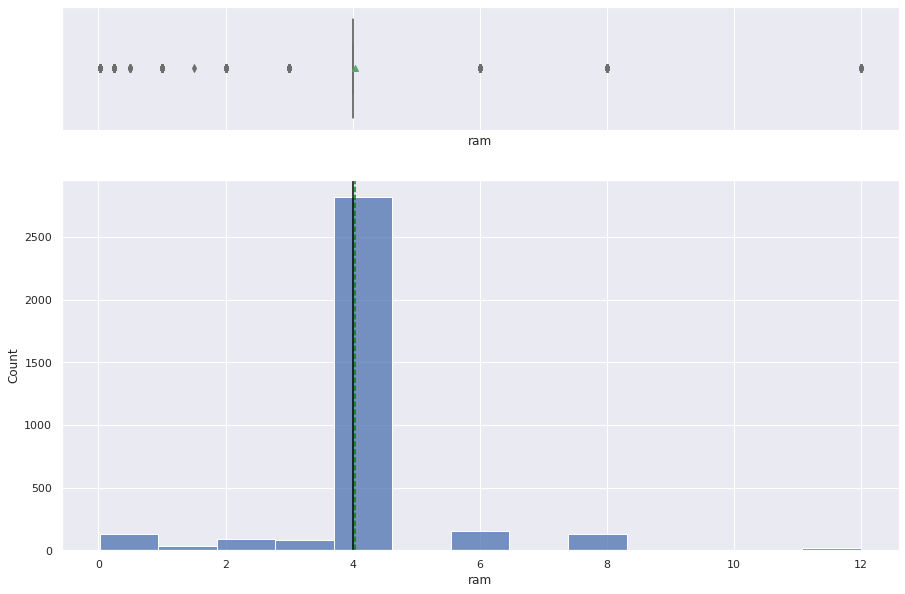

In [ ]:
hist_boxplot(df, "ram")

In [ ]:
fig=px.histogram(df, x='ram')
fig.show()

- 81.4% of phones have a RAM amount of around 4GB

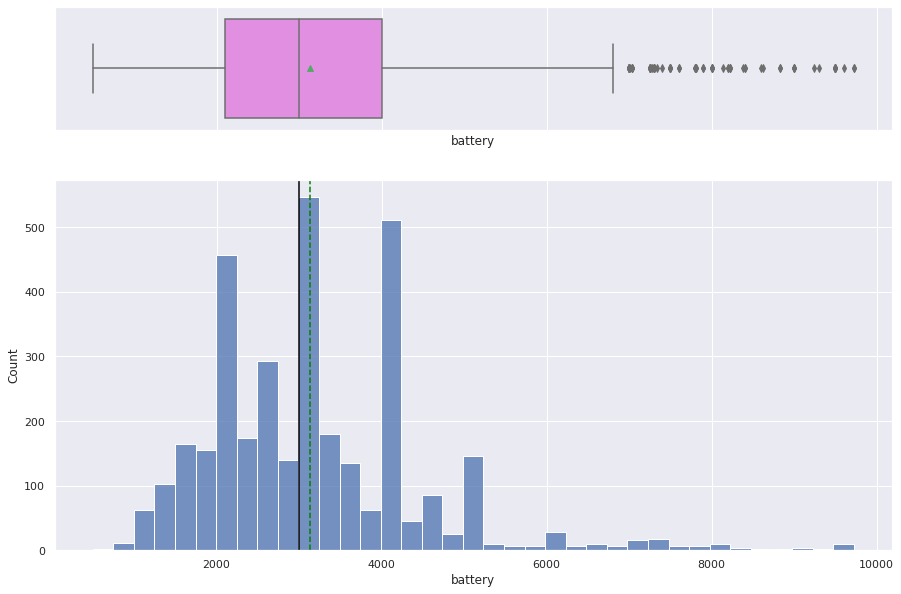

In [ ]:
hist_boxplot(df, "battery")

- 50% of phones have a battery life between 2200mAh and 4000mAh
- There are a lot of outliers to the right
- The median battery capacity is 3000mAh

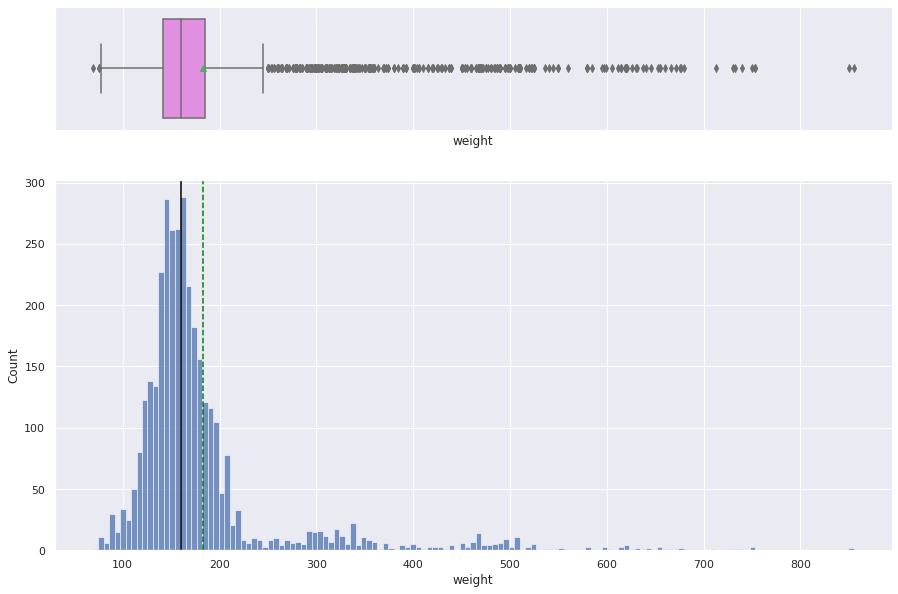

In [ ]:
hist_boxplot(df, "weight")

- The distribution is right-skewed, with a lot of outliers to the right of the graph.
- The median weight of phones is around 170g
- Some outliers seem odd.

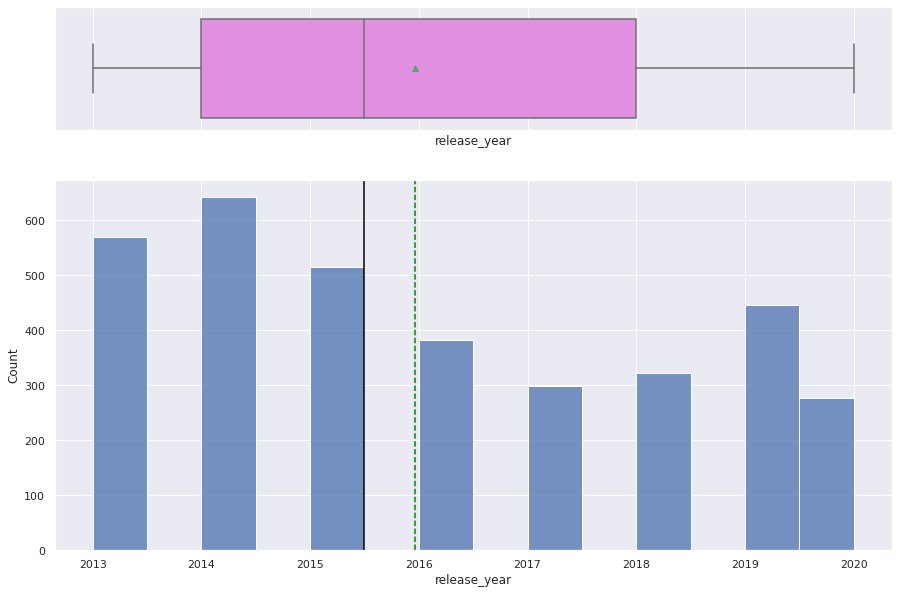

In [ ]:
hist_boxplot(df, "release_year")

- 2014 is the year with the most phones, rounding up to 650 devices.
- 2013 follows in second place with around 580 phones, and 2015 with a little over 500.


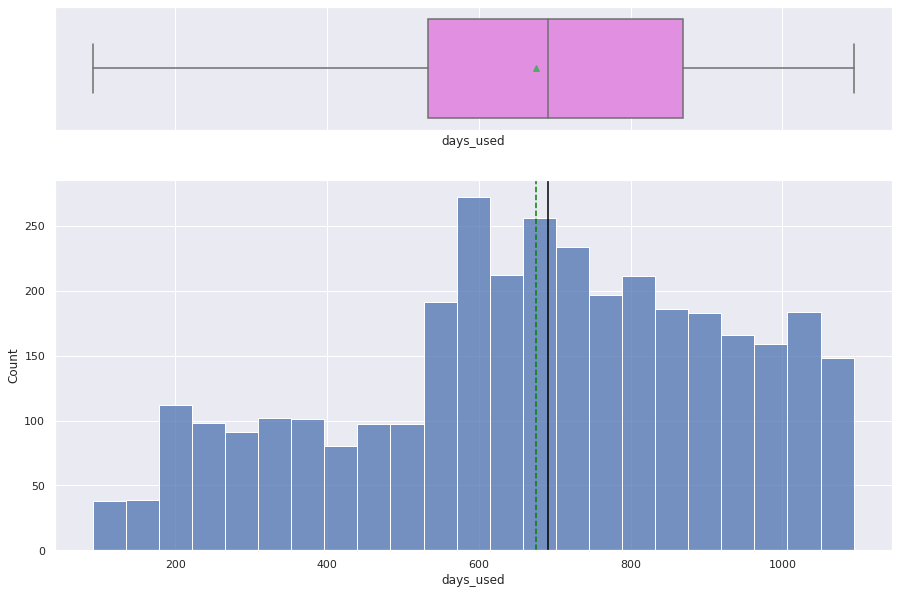

In [ ]:
hist_boxplot(df, "days_used")

- The distribution is left-skewed, with no outliers.
- The median days of phone usage is close to 700.
- 75% of phones are used between around 530 and around 1100 days.


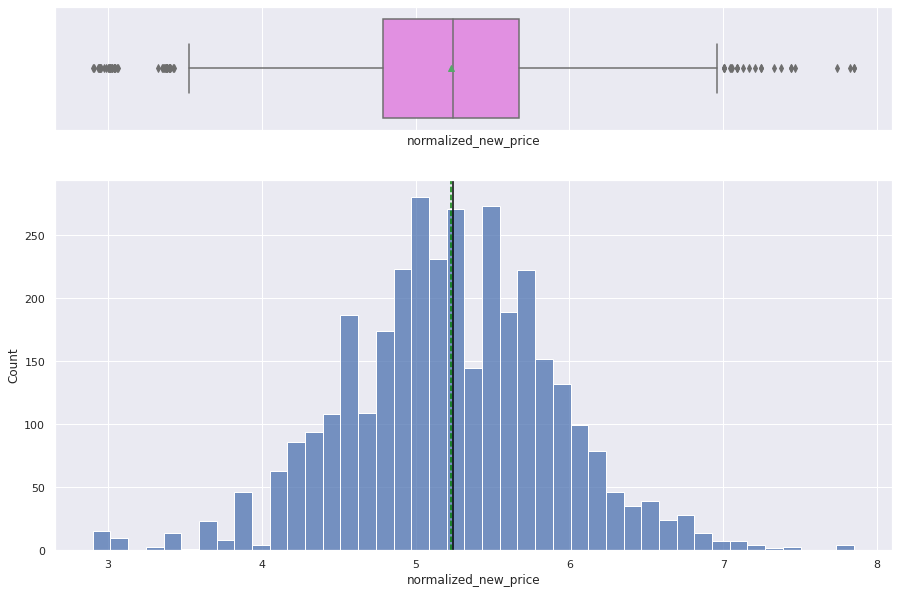

In [ ]:
hist_boxplot(df, "normalized_new_price")

In [ ]:
df['normalized_new_price'].mean()

5.233107171901414

In [ ]:
df['normalized_new_price'].max()

7.847840659422009

- The graph shows close to a normal distribution with outliers on both sides
- The average price for a new phone is around €523
- 50% of new phones range between around €480 and around €550
- The max price for a new phone is €784

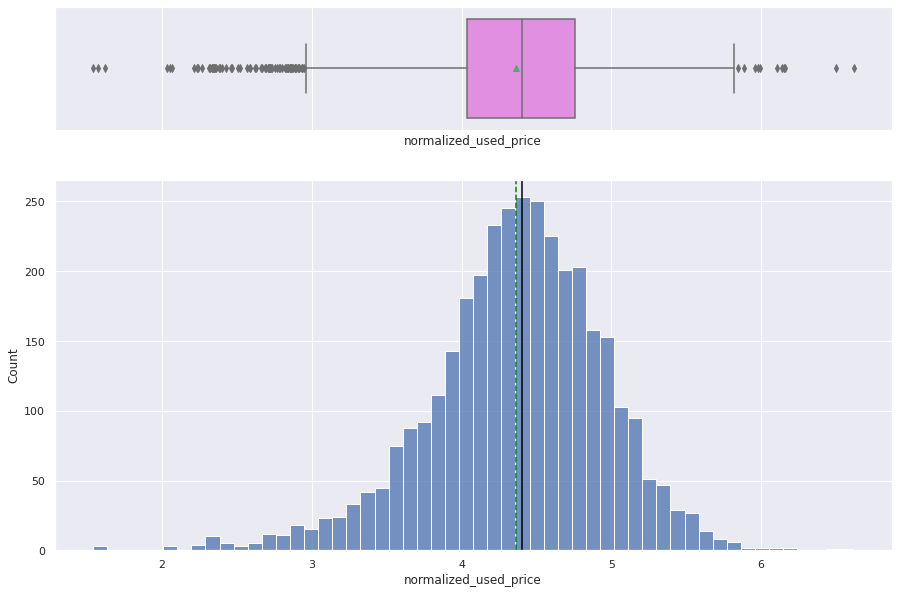

In [ ]:
# Regarding question 1:
# What does the distribution of normalized used device prices look like?
hist_boxplot(df, "normalized_used_price")

In [ ]:
df['normalized_used_price'].mean()

4.364712079133227

In [ ]:
df['normalized_used_price'].max()

6.619433001642933

- The graph shows close to a normal distribution with outliers on both sides
- The average price for a new phone is around €436
- 50% of new phones range between around €400 and around €480
- The max price for a new phone is €661

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    """
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n],)
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentages
        else:
            label = p.get_height() 
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  
        ax.annotate(label,(x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points",)  
        # show the percentage
        
    plt.show() 

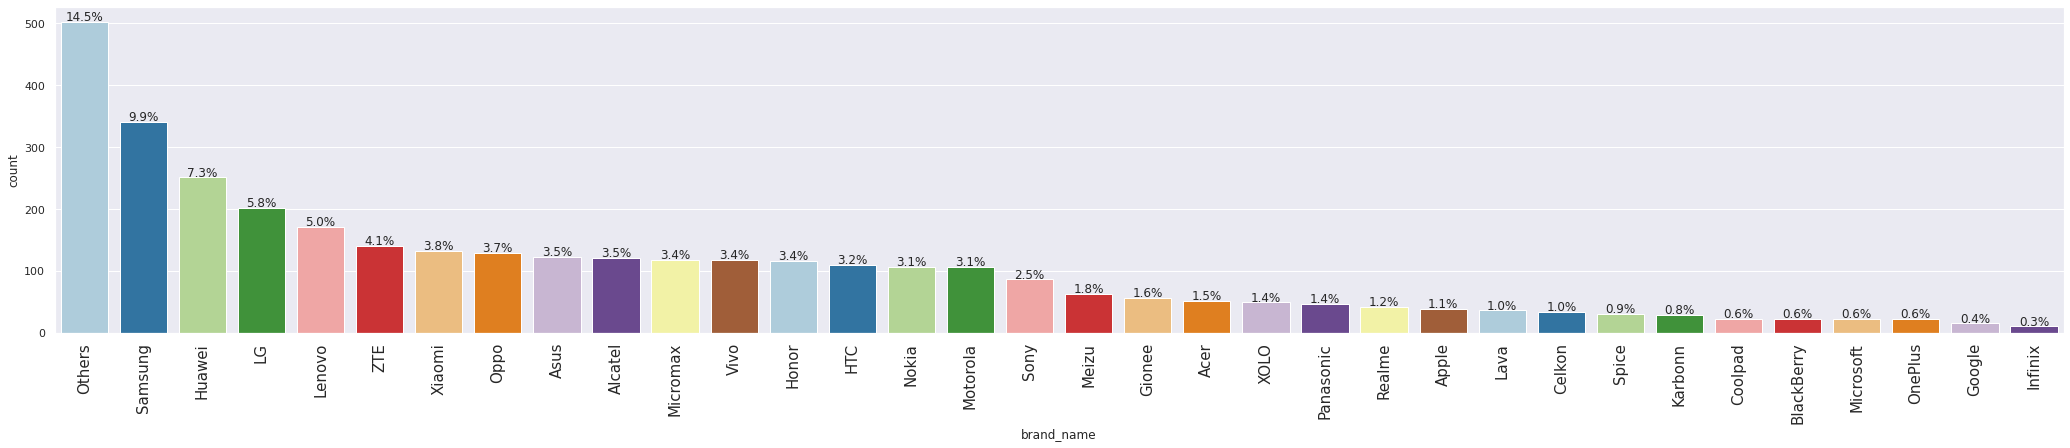

In [ ]:
labeled_barplot(df, "brand_name", perc=True)

- 14.5% of brand names are categorized as "others"
- The second highest category for brand name is Samsung, with 9.9%, followed by Huawei with 7.3%, and then LG with 5.8%.

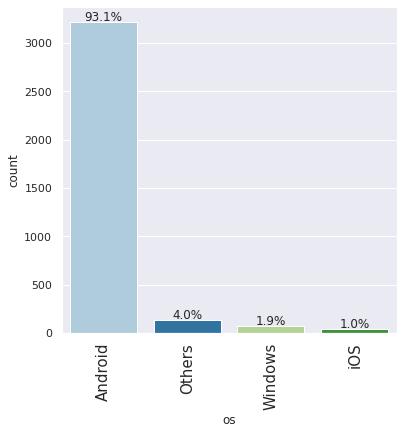

In [ ]:
# Regarding question 2:
# What percentage of the used device market is dominated by Android devices?
labeled_barplot(df, "os", perc=True)

In [ ]:
df.groupby("os")["normalized_used_price"].count()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: normalized_used_price, dtype: int64

- 93.1% of phones run on Andriod, and only 1% on IOS

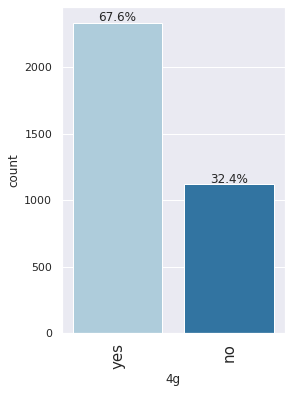

In [ ]:
labeled_barplot(df, "4g", perc=True)

- 67.6% of phones provide a 4G option.

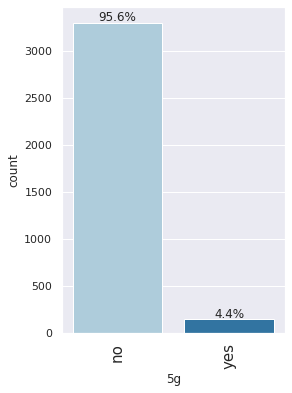

In [ ]:
labeled_barplot(df, "5g", perc=True)

- 95.6% of phones provide a 5G option.

In [ ]:
# creating a list of the numerical columns for correlation check 
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("release_year")

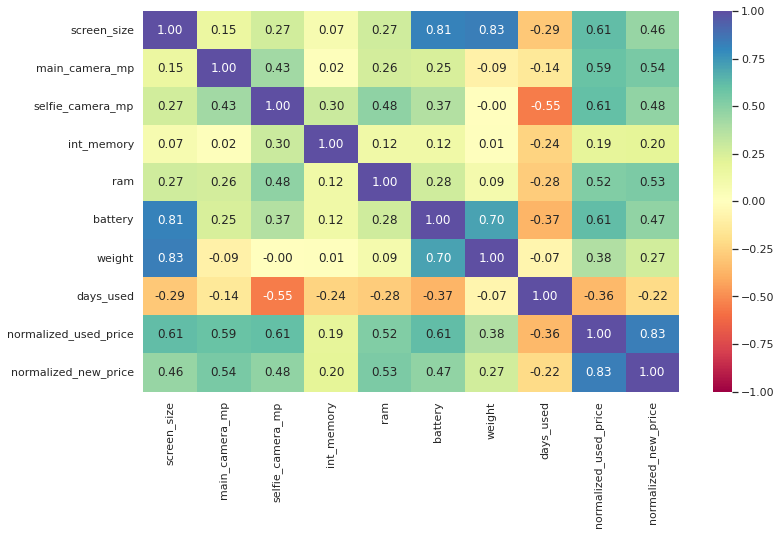

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Regarding question 7: **Which attributes are highly correlated with the normalized price of a used device?**
- There's a high correlation between:
  - Battery and weight.
  - Normalized used price and normalized new price.
  - Battery and screen size.
  - Weight and screen size.


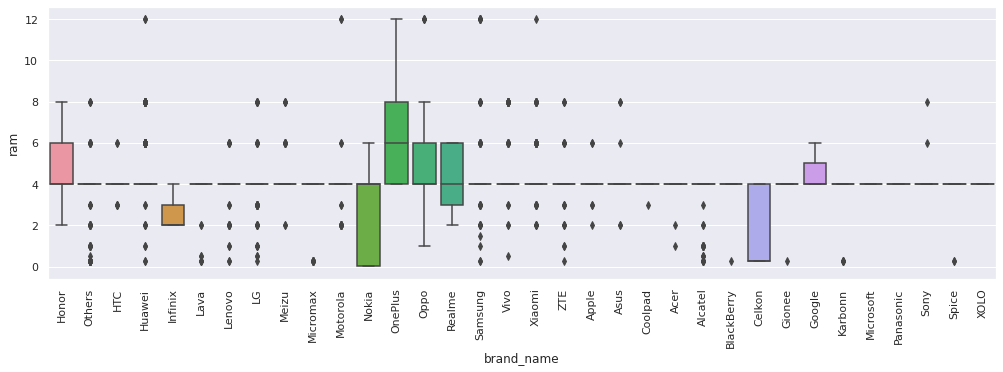

In [ ]:
# Regarding question 3:
# How does the amount of RAM vary with the brand?# 
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- Nokia and Celkon are one of the brands with the lowest RAM
- OnePlus is the brand with the highest RAM, with a median of 6
- Most brands have a lot of outliers

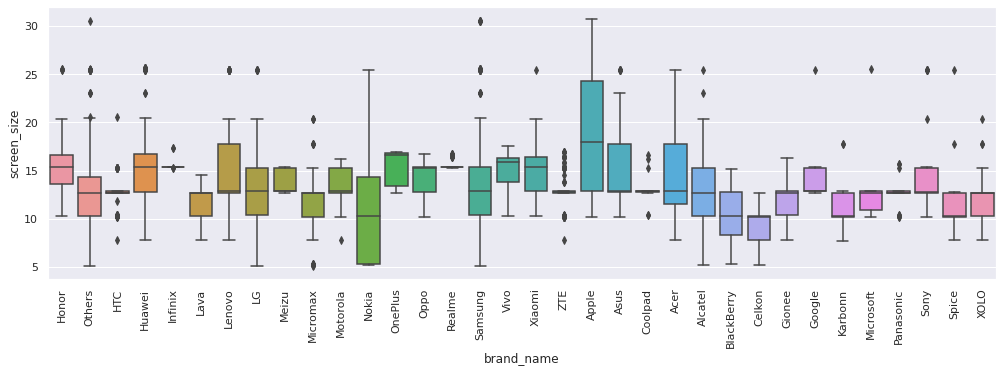

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

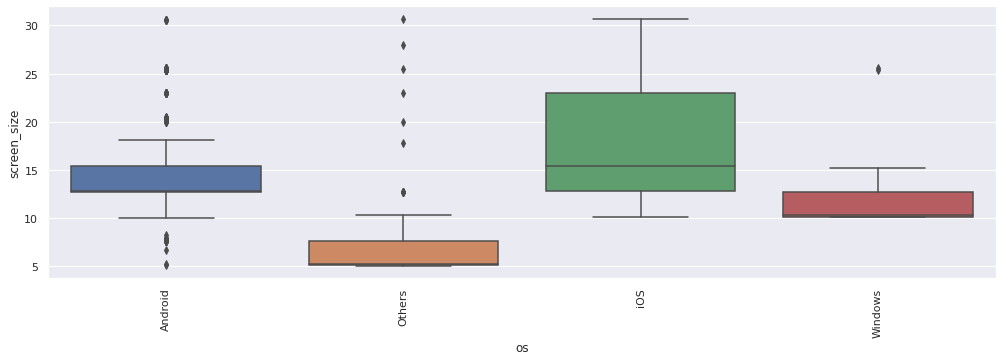

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="os", y="screen_size")
plt.xticks(rotation=90)
plt.show()

- Apple is the brand with the biggest screen size, with a median of around 17.5cm
- Nokia and Celkon are the top 2 brands with the smallest screen sizes available

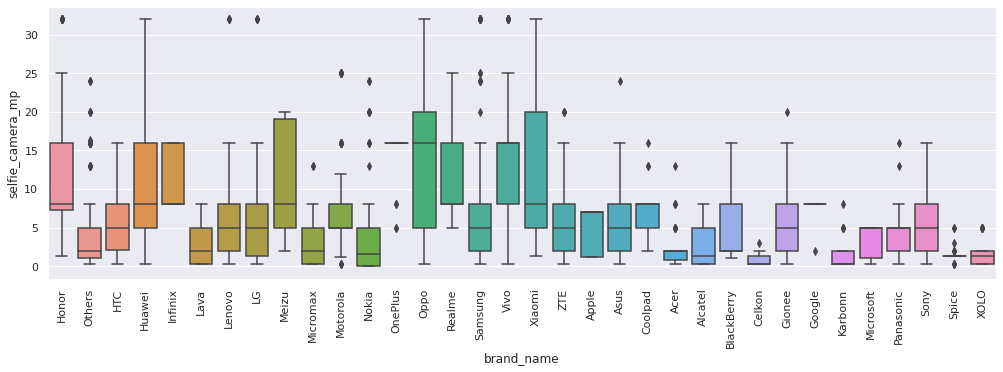

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

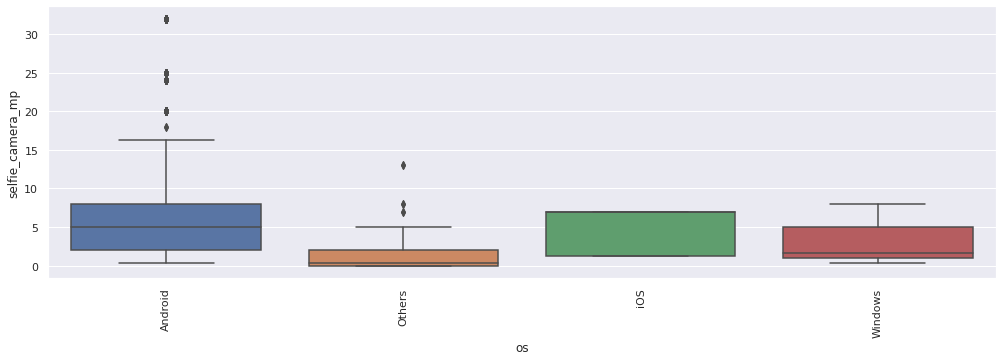

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="os", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

- Oppo and Xiaomi have the highest resolution on their selfie cameras, followed by Huawei and then Meizu
- Overall Android has better selfie camera resolution

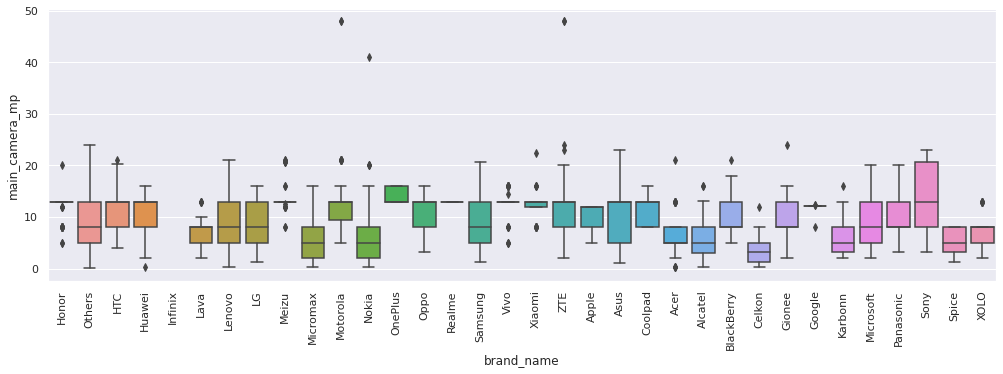

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

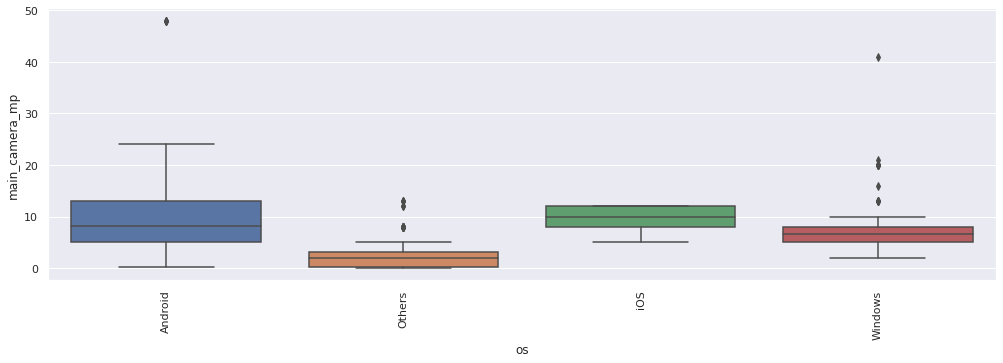

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="os", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

- Sonny and OnePlus have the highest resolution on their main cameras.
- Overall Android has better main camera resolution


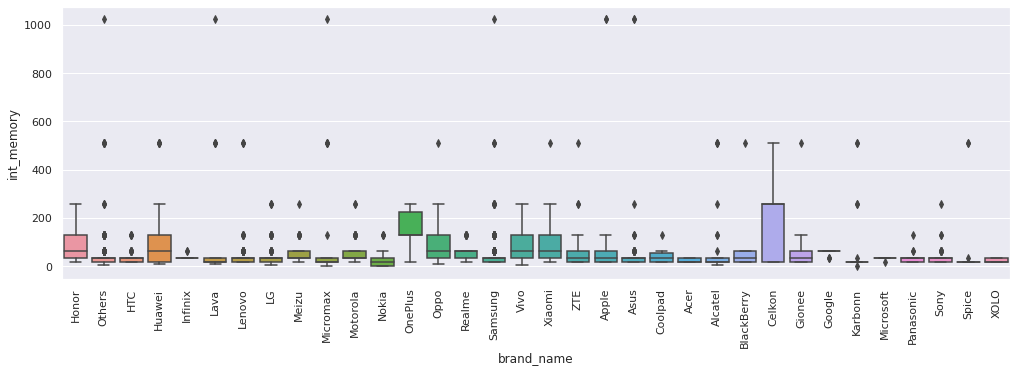

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="int_memory")
plt.xticks(rotation=90)
plt.show()

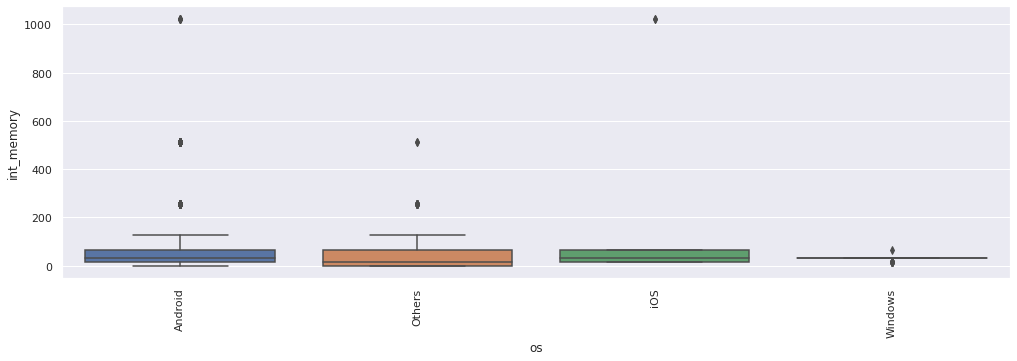

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="os", y="int_memory")
plt.xticks(rotation=90)
plt.show()

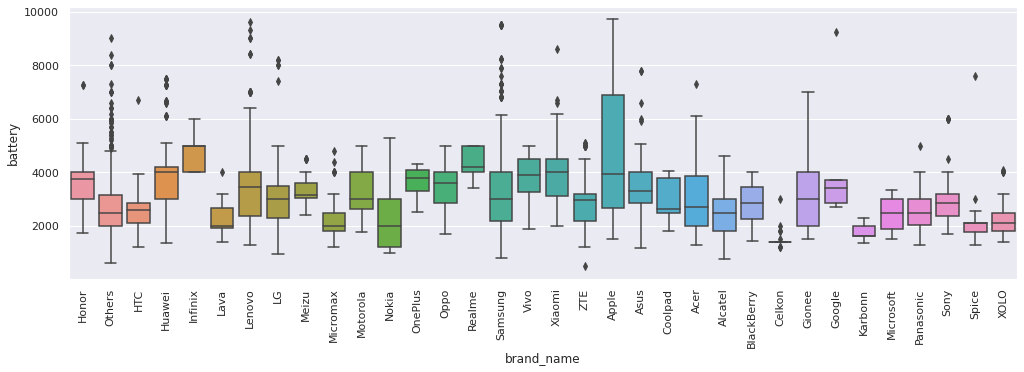

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.show()

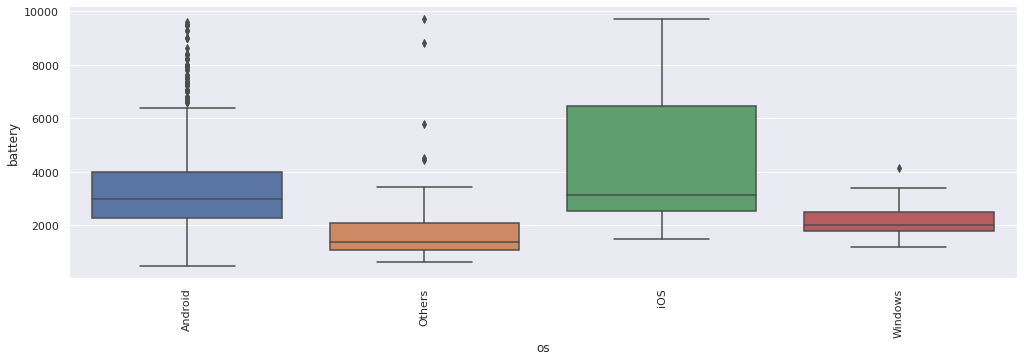

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="os", y="battery")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("brand_name")["battery"].mean()

brand_name
Acer          2999.607843
Alcatel       2452.975207
Apple         4628.910256
Asus          3499.836066
BlackBerry    2822.500000
Celkon        1475.757576
Coolpad       2945.000000
Gionee        3117.946429
Google        3628.333333
HTC           2614.454545
Honor         3690.517241
Huawei        3745.159363
Infinix       4800.000000
Karbonn       1724.137931
LG            3033.980100
Lava          2248.611111
Lenovo        3618.479532
Meizu         3368.220339
Micromax      2224.786325
Microsoft     2382.380952
Motorola      3312.594340
Nokia         2259.615385
OnePlus       3716.590909
Oppo          3380.581395
Others        2821.952191
Panasonic     2682.978723
Realme        4337.317073
Samsung       3362.683284
Sony          3003.372093
Spice         2191.000000
Vivo          3718.846154
XOLO          2220.000000
Xiaomi        3979.848485
ZTE           2894.821429
Name: battery, dtype: float64

- Infinix has the highest mean battery capacity (4800mAh), followed by Apple (4628mAh) and then Realme with 4337mAh.

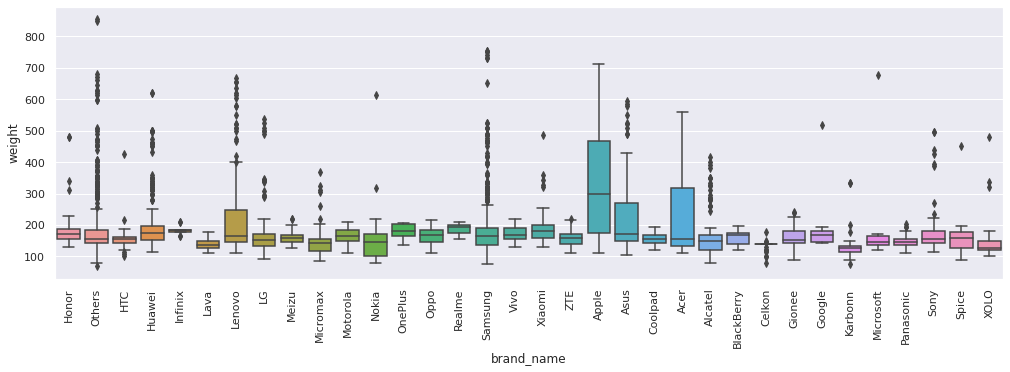

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

- Apple has considerabely heavier phones compared to the rest.

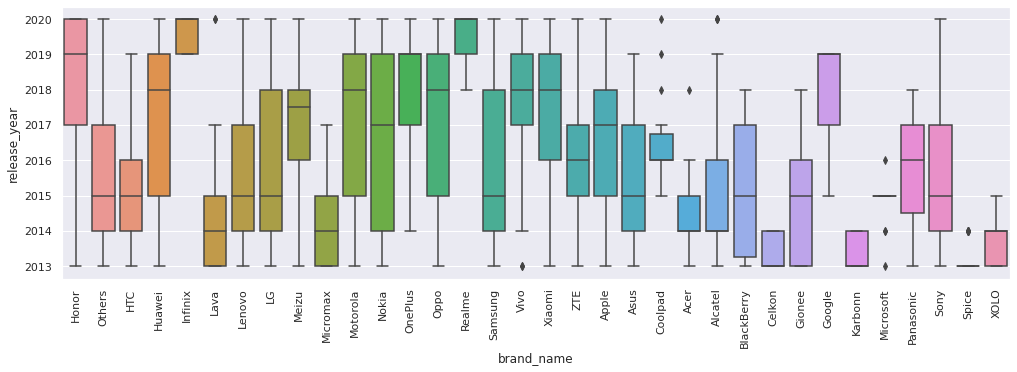

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="release_year")
plt.xticks(rotation=90)
plt.show()

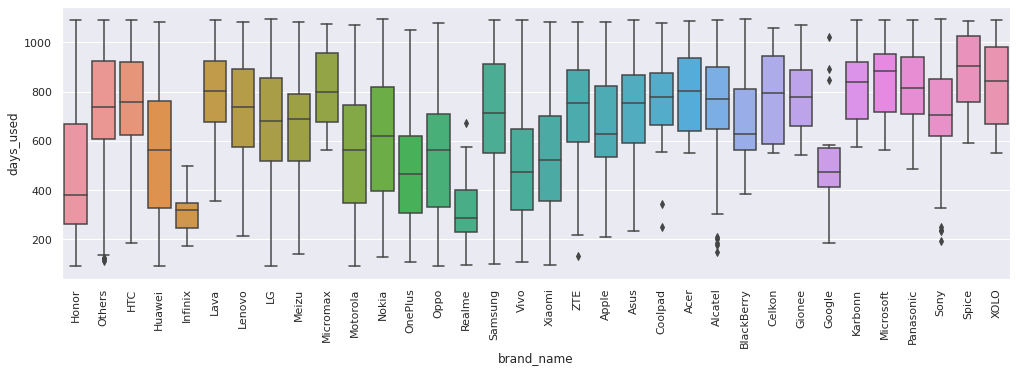

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="days_used")
plt.xticks(rotation=90)
plt.show()

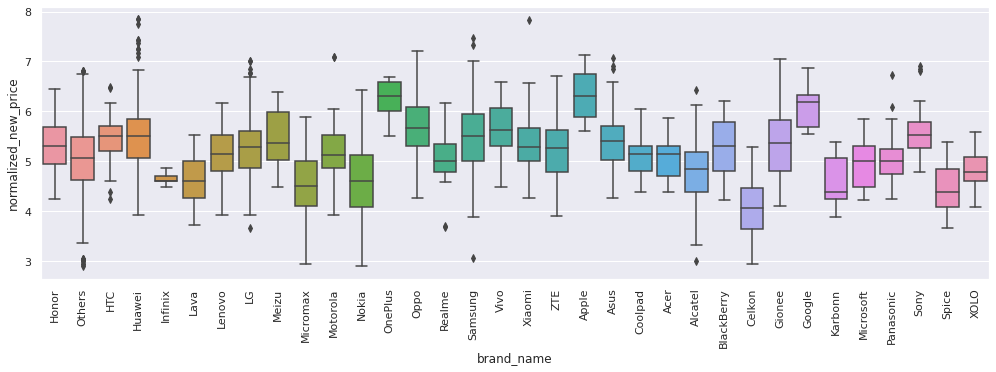

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

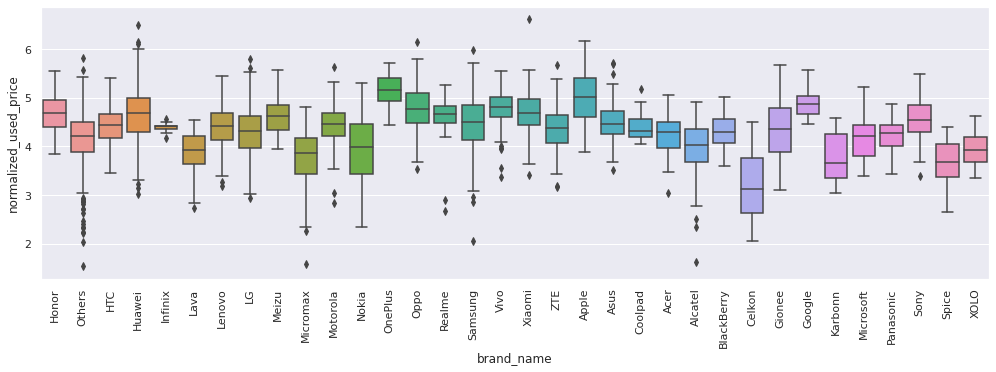

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

- Apple and OnePlus are the highest costing phones

In [ ]:
# For question 4 "How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?"
# looking at how many phones have batteries larger than 4500mAh
df.loc[df['battery'] > 4500].count()

brand_name               341
os                       341
screen_size              341
4g                       341
5g                       341
main_camera_mp           287
selfie_camera_mp         341
int_memory               341
ram                      341
battery                  341
weight                   341
release_year             341
days_used                341
normalized_used_price    341
normalized_new_price     341
dtype: int64

In [ ]:
# saving phones over 4500mAh batteries in another df for further analysis
df_LB = df.loc[df['battery'] > 4500]

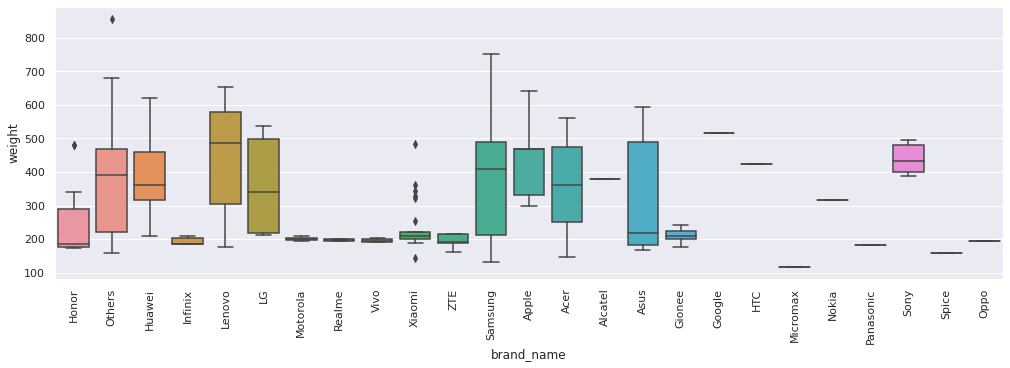

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df_LB, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_LB["weight"].mean()

332.2756598240469

- The weight of phones with batteries over 4500mAh varies significantly, ranging from around 100g all the way to almost 900g.
- The average weight of phones with batteries over 4500mAh, is 332g

In [ ]:
# Regarding Question 5: 
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
df_LS = df.loc[df['screen_size'] > 15.24]

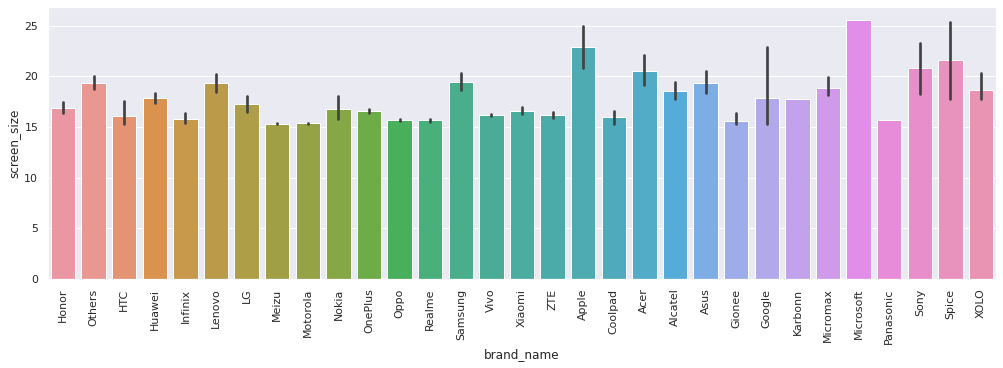

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(data=df_LS, x="brand_name", y="screen_size") 
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_LS.loc[df_LS['brand_name']=='Apple'].groupby("brand_name")["screen_size"].max()

brand_name
Apple    30.71
Name: screen_size, dtype: float64

In [ ]:
df_LS.groupby(['brand_name'])[['screen_size']].max()

,screen_size
brand_name,
Acer,25.43
Alcatel,25.43
Apple,30.71
Asus,25.43
Coolpad,16.59
Gionee,16.33
Google,25.45
HTC,20.55
Honor,25.50


In [ ]:
df_LS.count()

brand_name               1099
os                       1099
screen_size              1099
4g                       1099
5g                       1099
main_camera_mp            930
selfie_camera_mp         1098
int_memory               1099
ram                      1099
battery                  1098
weight                   1099
release_year             1099
days_used                1099
normalized_used_price    1099
normalized_new_price     1099
dtype: int64

- There are 1099 phones with screens larger than 6in.
- The brand with the largest screen size is Apple, with a screen size of around 30.7in, followed by Samsung, and then Huawei.


In [ ]:
# Regarding Question 6:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
df_LSC = df.loc[df['selfie_camera_mp'] > 8]

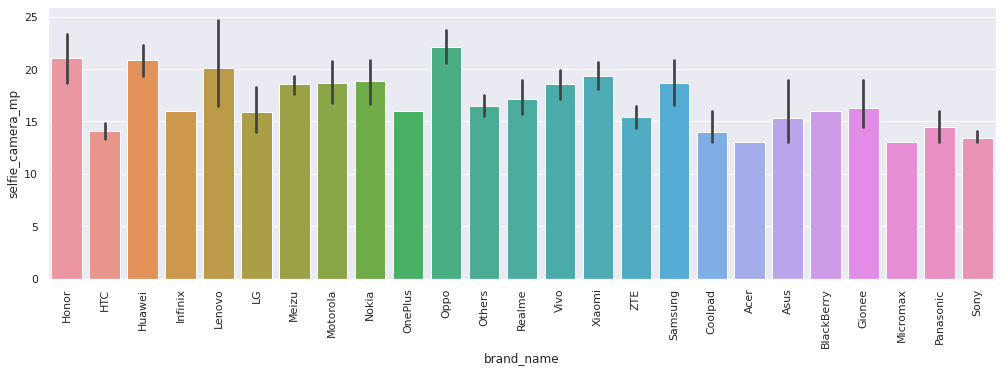

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(data=df_LSC, x="brand_name", y="selfie_camera_mp") 
plt.xticks(rotation=90)
plt.show()

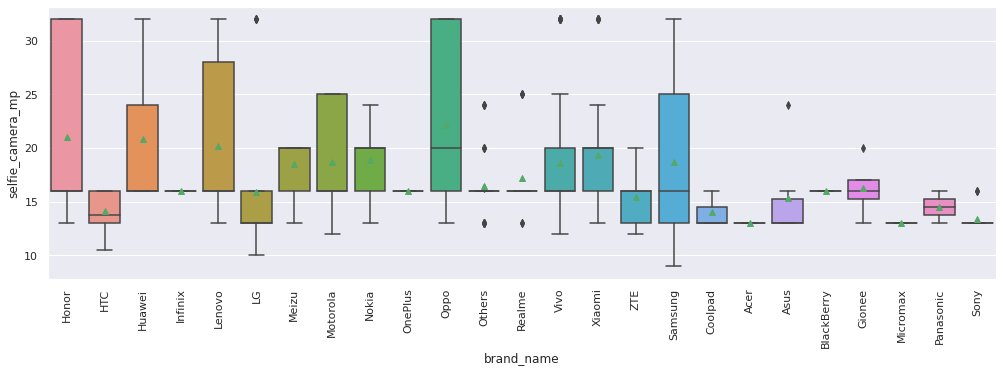

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df_LSC, x="brand_name", y="selfie_camera_mp",showmeans=True) 
plt.xticks(rotation=90)
plt.show()

- The brand with the highest selfie camera resolution mean is Oppo, with around 22mp, and goes all the way up to around 33mp.
- The following brands with highest selfie camera resolution are Honor and Huawei, with around 21mp means.

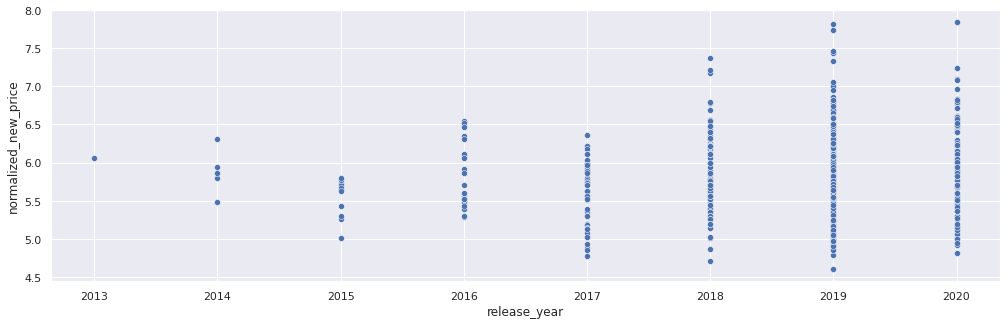

In [ ]:
plt.figure(figsize=(17, 5))
sns.scatterplot(data=df_LSC, x="release_year", y="normalized_new_price") 
plt.show()

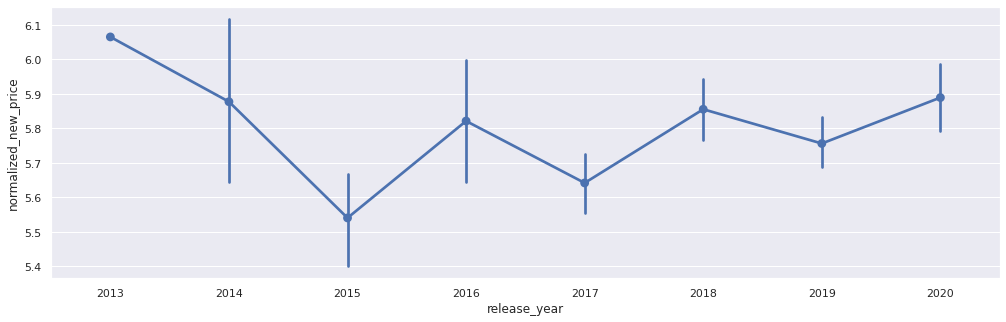

In [ ]:
plt.figure(figsize=(17, 5))
sns.pointplot(data=df_LSC, x="release_year", y="normalized_new_price") 
plt.show()

- Overall, prices of new phones tend to increase by the year, though we can see a bit of a difference between 2014 and 2015, where 2014 prices where a little higher. We can do this same comparison between 2016 and 2017.

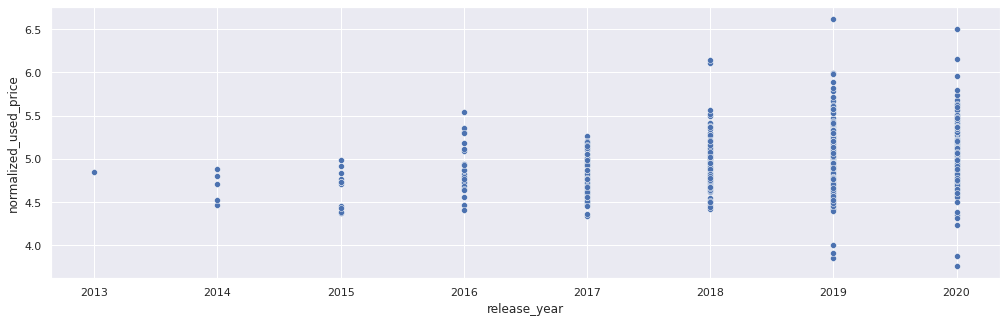

In [ ]:
plt.figure(figsize=(17, 5))
sns.scatterplot(data=df_LSC, x="release_year", y="normalized_used_price") 
plt.show()

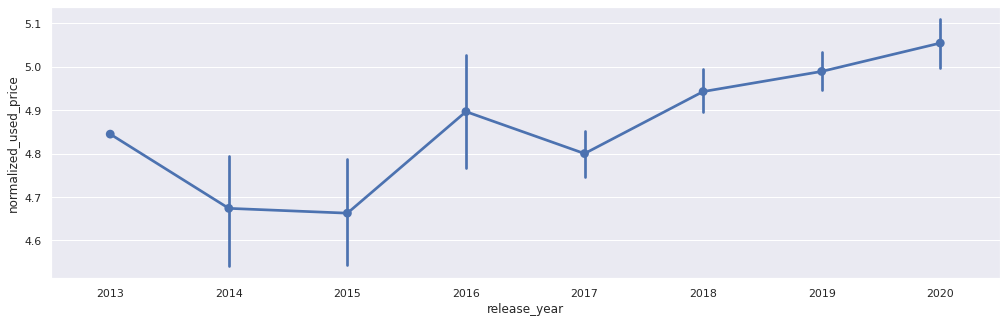

In [ ]:
plt.figure(figsize=(17, 5))
sns.pointplot(data=df_LSC, x="release_year", y="normalized_used_price") 
plt.show()

- Evolution of prices of used phones is more uniform than the one from new phones. We can tell crearly how used phones follow a more exponential growth.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


In [ ]:
# creating a copy of the df
df1 = df.copy()

In [ ]:
# Looking at the rows with missing value for selfie_camera_mp
df1.loc[df['selfie_camera_mp'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


In [ ]:
# Filling NaNs from selfie_camera_mp with the median from release_year
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(value = df1.groupby(['release_year'])['selfie_camera_mp'].transform('median'))

In [ ]:
# Looking at the rows with missing value for int_memory
df.loc[df['int_memory'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [ ]:
# Filling NaNs from int_memory with the median from release_year
df1['int_memory'] = df1['int_memory'].fillna(value = df1.groupby(['release_year'])['int_memory'].transform('median'))

In [ ]:
# Looking at the rows with missing value for ram
df.loc[df['ram'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [ ]:
# Filling NaNs from ram with the median from release_year
df1['ram'] = df1['ram'].fillna(value = df1.groupby(['release_year'])['ram'].transform('median'))

In [ ]:
# Looking at the rows with missing value for battery
df.loc[df['battery'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


In [ ]:
# Filling NaNs from battery with the median from brand_name
df1['battery'] = df1['battery'].fillna(value = df1.groupby(['brand_name'])['battery'].transform('median'))

In [ ]:
# Looking at the rows with missing value for weight
df.loc[df['weight'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


In [ ]:
# Filling NaNs from main_camera_mp with the median from brand_name
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value = df1.groupby(['brand_name'])['main_camera_mp'].transform('median'))

In [ ]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Looking at the rows with missing value for main_camera_mp
df1.loc[df['main_camera_mp'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,13.0,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,13.0,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,13.0,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


In [ ]:
df1.loc[df['brand_name']=='Infinix'].groupby(['brand_name'])[['main_camera_mp']].mean()

,main_camera_mp
brand_name,
Infinix,NaN


In [ ]:
# Filling NaNs from main_camera_mp of Infinix with the median from release_year
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value = df1.groupby(['release_year'])['main_camera_mp'].transform('median'))

In [ ]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
# We will create a new variable to replace release_year
df1["phone_age"] = 2021 - df1["release_year"]
# We used 2021 as year of reference since the data was collected that year
df1.drop("release_year", axis=1, inplace=True)

In [ ]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,phone_age
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


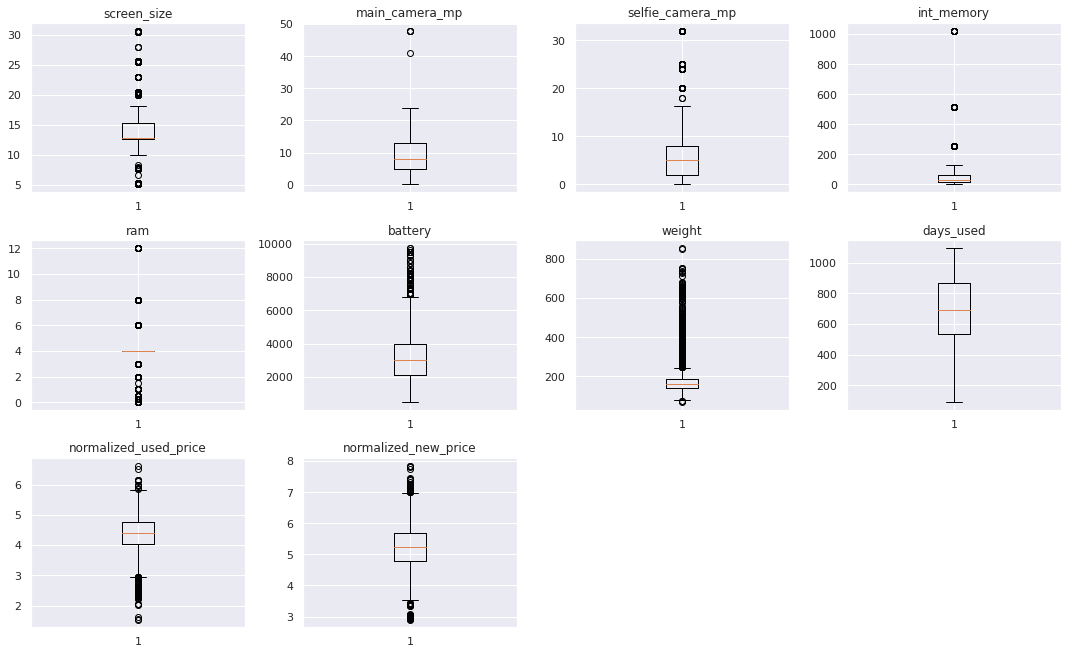

In [ ]:
# outlier detection
plt.figure(figsize=(15, 12))

# Function that looks at all numeric columns and will return boxplots for each variable and its outliers
for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# setting the range for the outliers
Q1 = df1[num_cols].quantile(0.25)
Q3 = df1[num_cols].quantile(0.75)

IQR = Q3 - Q1                   

lower_whisker = Q1 - 1.5*IQR    
upper_whisker = Q3 + 1.5*IQR

# getting %'s of outliers
((df1[num_cols] < lower_whisker) | (df1[num_cols] > upper_whisker)).sum()/df1.shape[0]*100

screen_size              13.028373
main_camera_mp            0.144760
selfie_camera_mp          6.398379
int_memory                3.995368
ram                      18.442386
battery                   2.229299
weight                   10.654314
days_used                 0.000000
normalized_used_price     2.460915
normalized_new_price      1.910828
dtype: float64

We won't be treating any outliers because we don't hav enough information to judge accordingly.

In [ ]:
# Preparing data for modelling: Creating x and y
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]
print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  phone_age  
0              4.715100          1  
1              5.519018          1  
2              5.884631          1  
3              5.630961          1  
4              4.9478

In [ ]:
# Adding the intercept 
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True,)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data into 70:30 ratio for train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# checking how many rows in each set
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

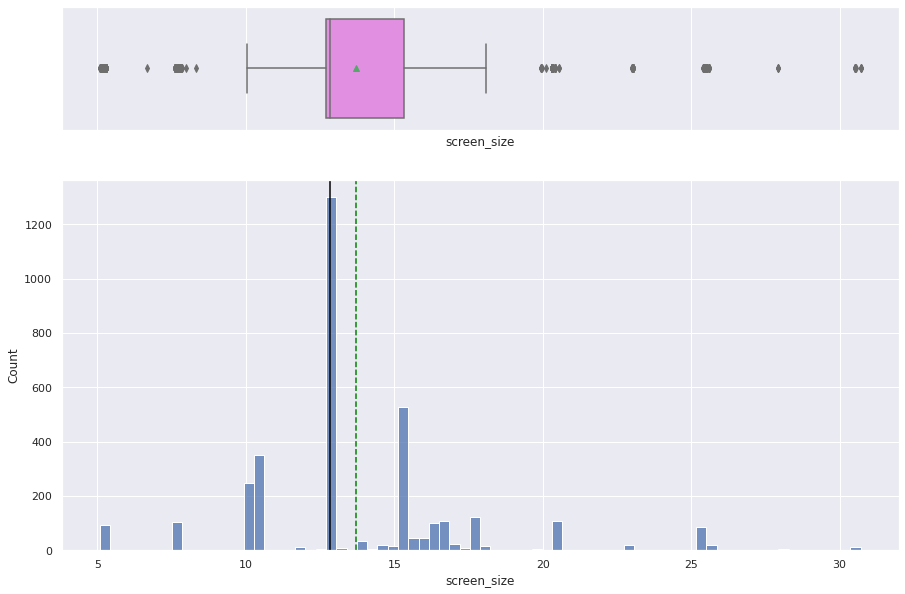

In [ ]:
hist_boxplot(df1, "screen_size")

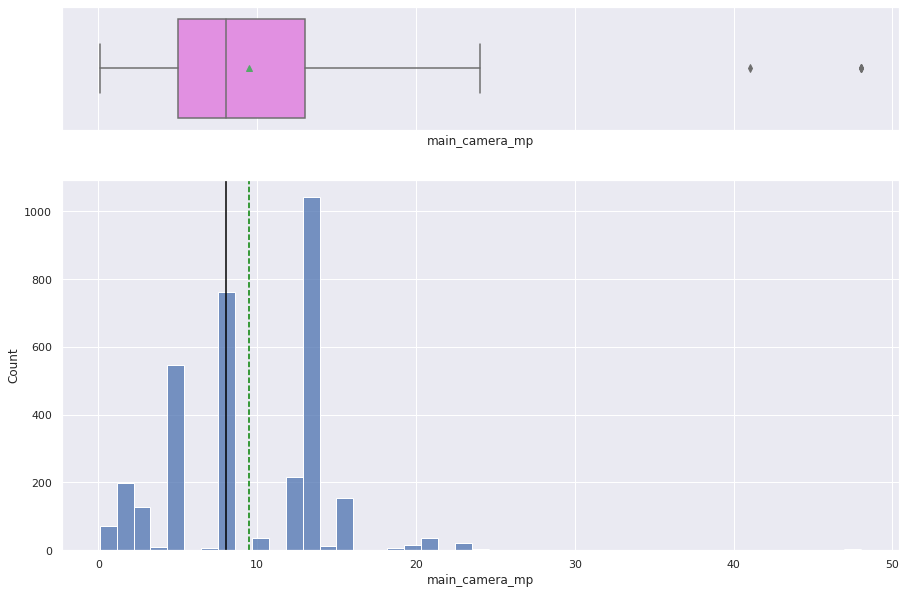

In [ ]:
hist_boxplot(df1, "main_camera_mp")

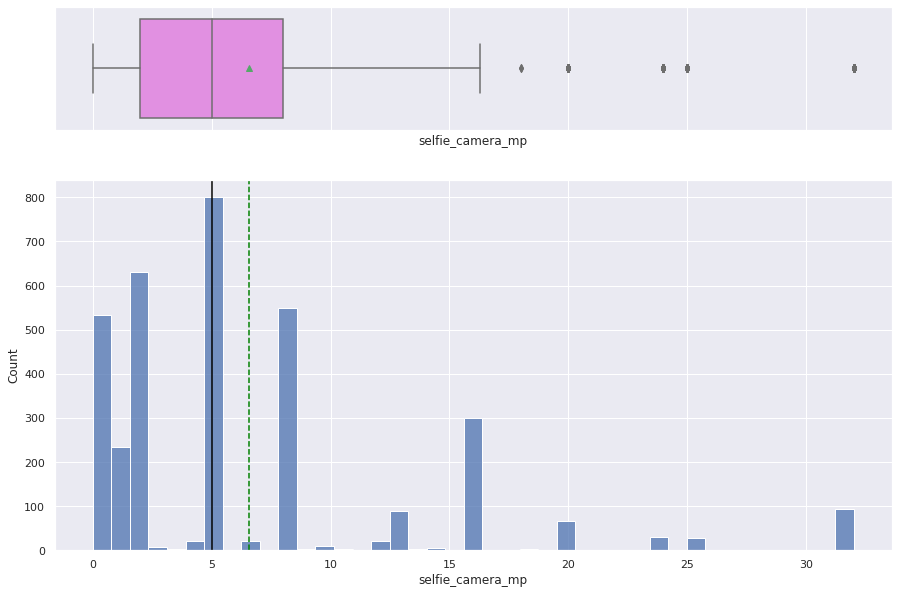

In [ ]:
hist_boxplot(df1, "selfie_camera_mp")

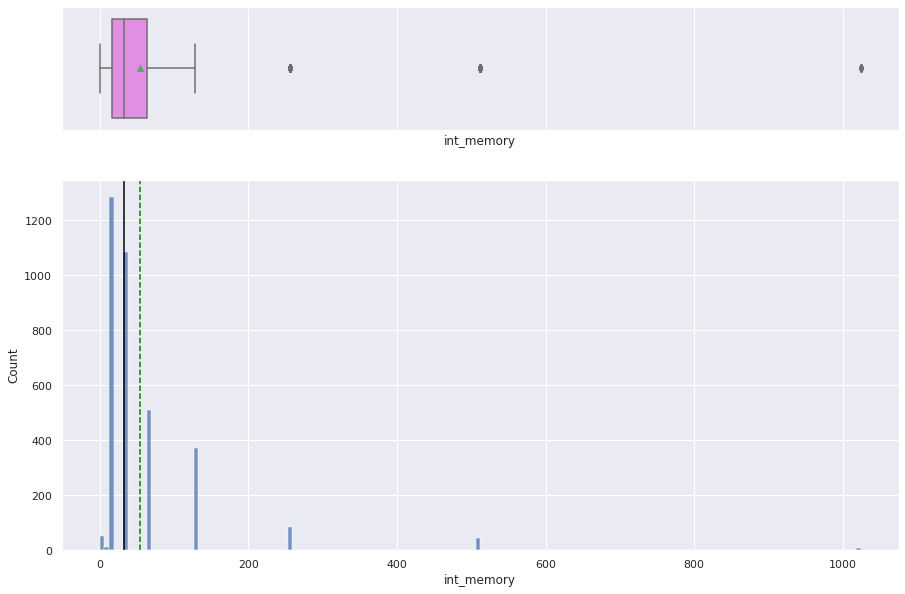

In [ ]:
hist_boxplot(df1, "int_memory")

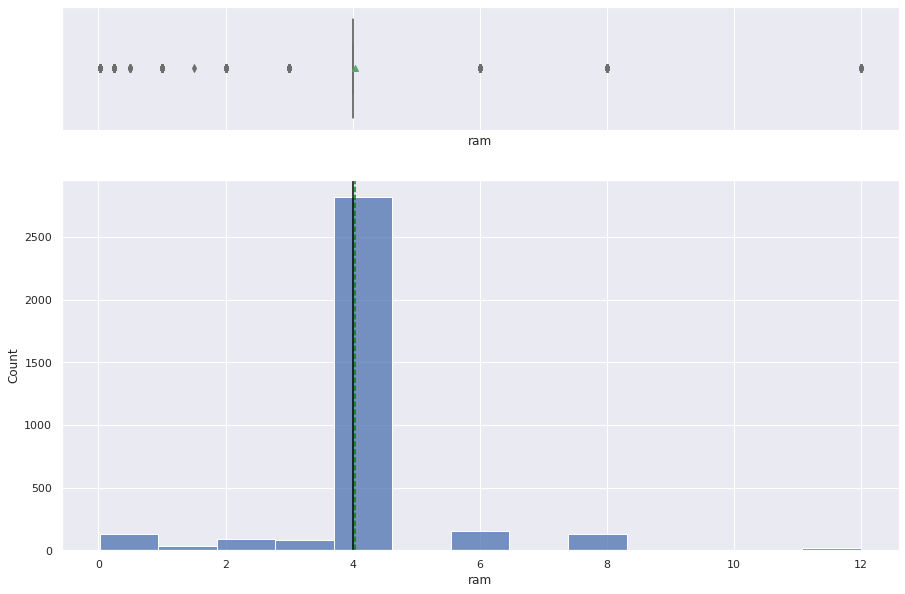

In [ ]:
hist_boxplot(df1, "ram")

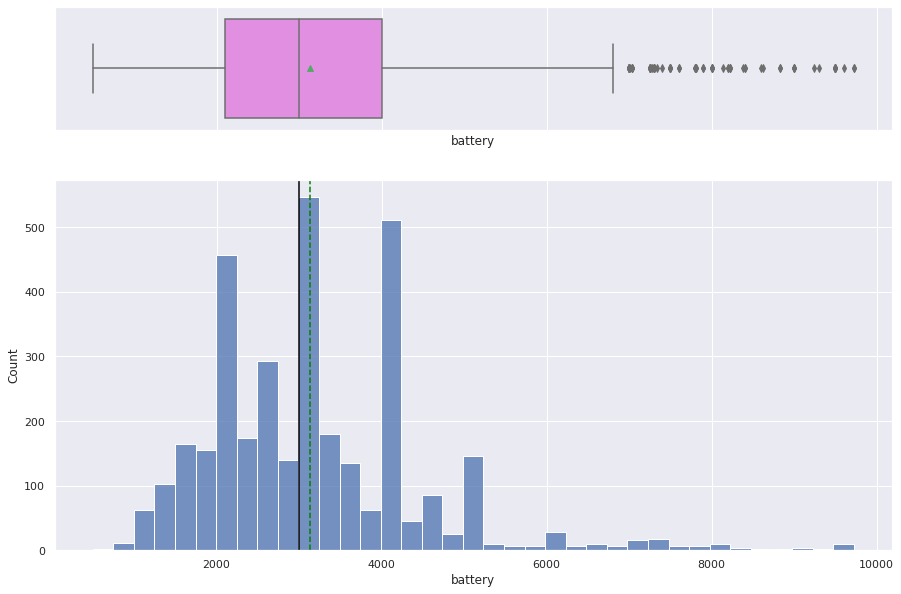

In [ ]:
hist_boxplot(df1, "battery")

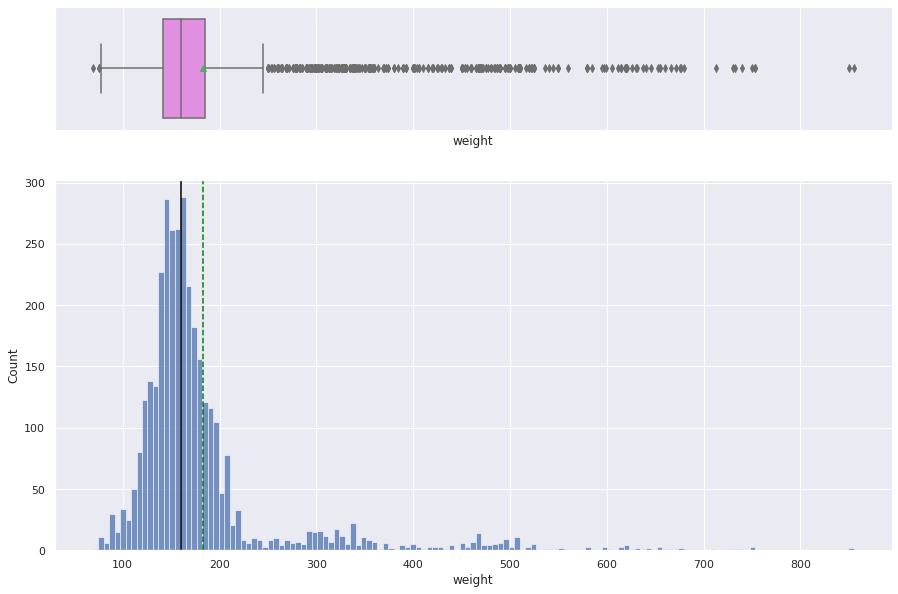

In [ ]:
hist_boxplot(df1, "weight")

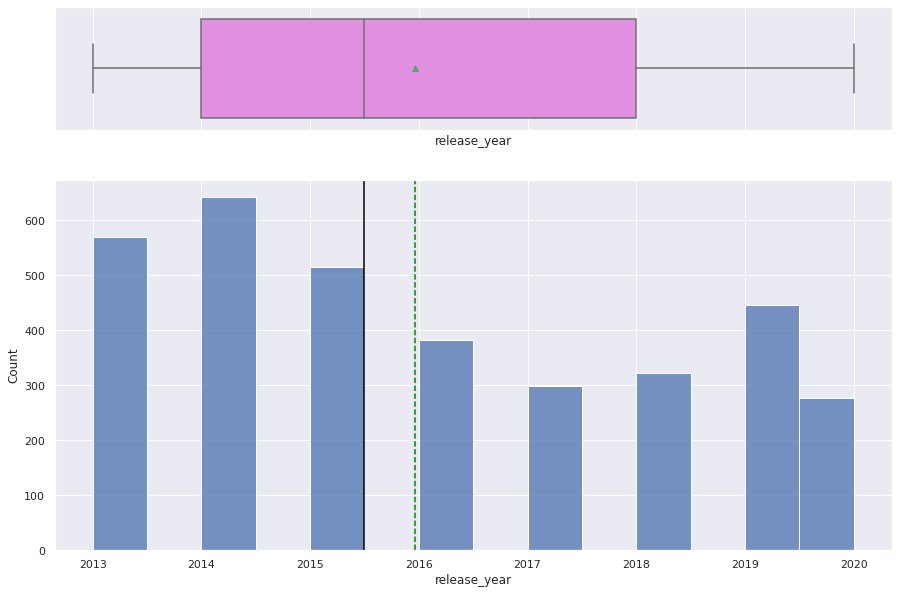

In [ ]:
hist_boxplot(df1, "release_year")

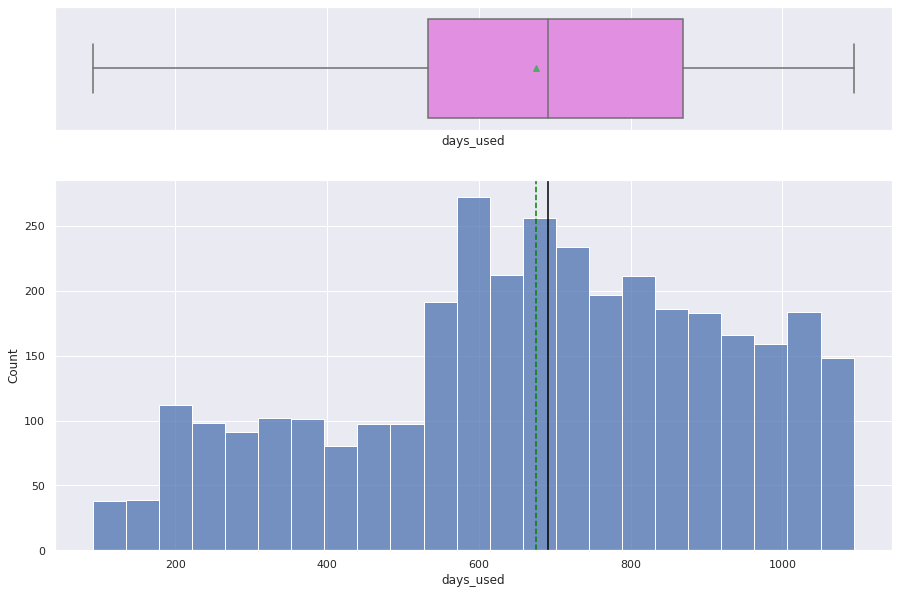

In [ ]:
hist_boxplot(df1, "days_used")

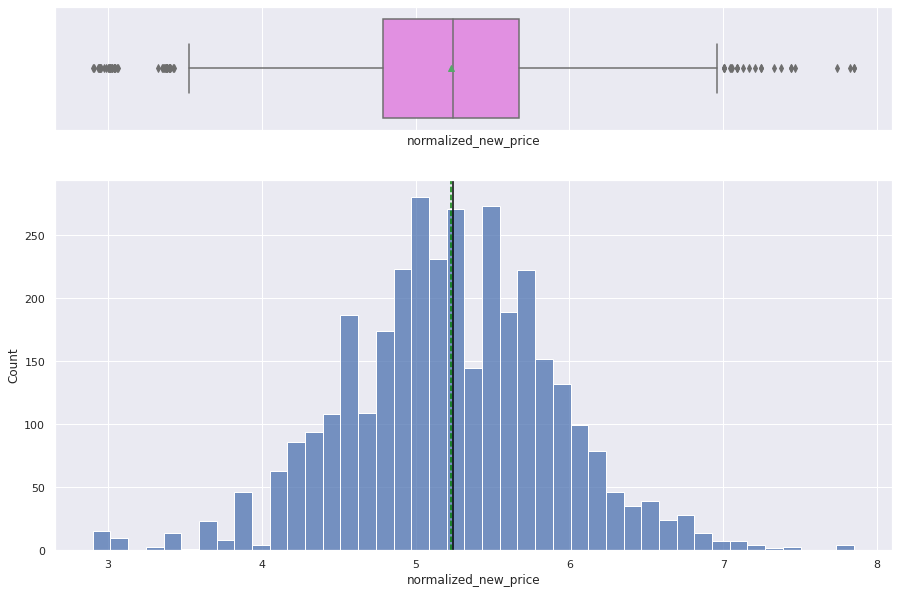

In [ ]:
hist_boxplot(df1, "normalized_new_price")

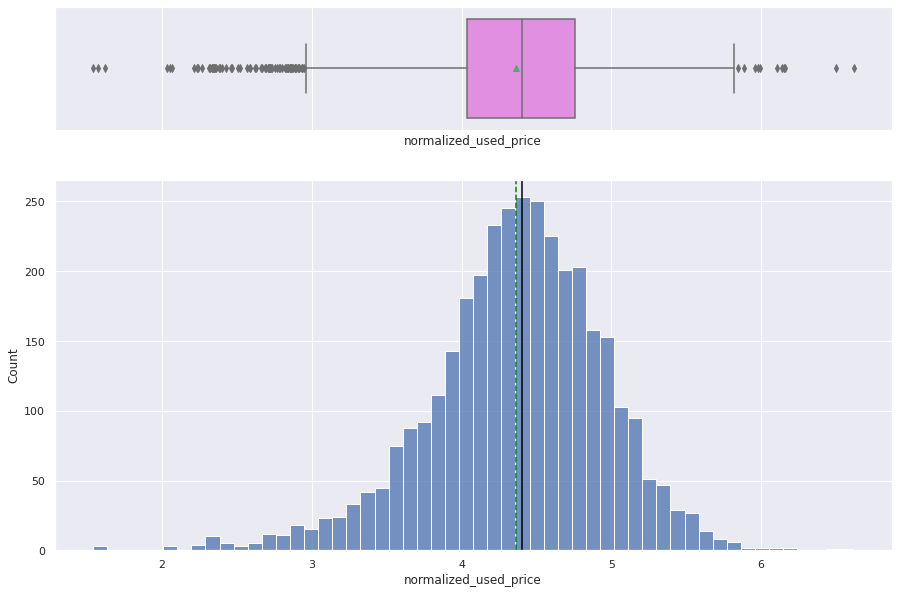

In [ ]:
hist_boxplot(df1, "normalized_used_price")

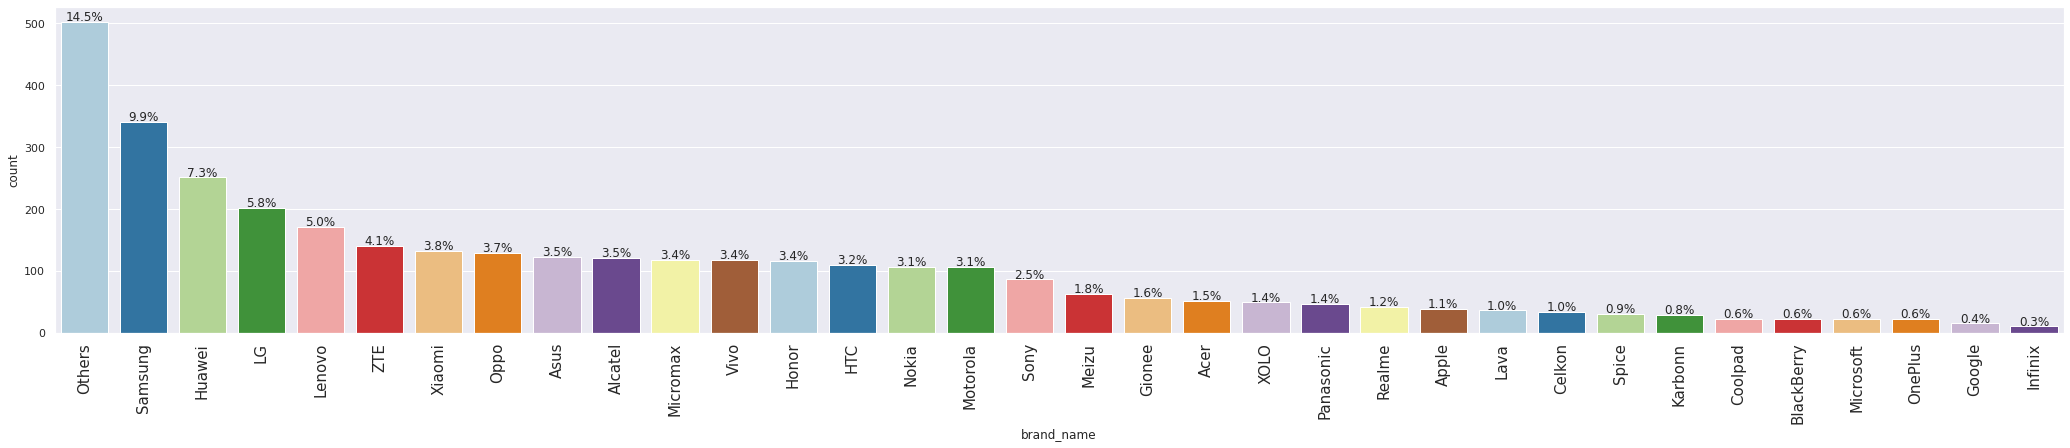

In [ ]:
labeled_barplot(df1, "brand_name", perc=True)

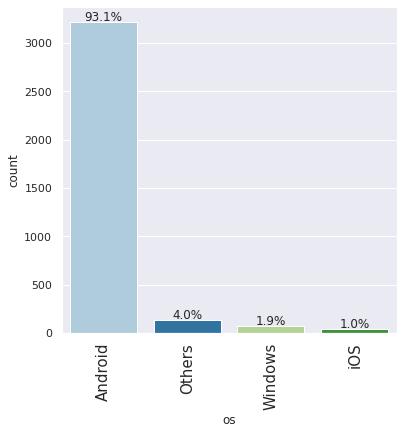

In [ ]:
labeled_barplot(df1, "os", perc=True)

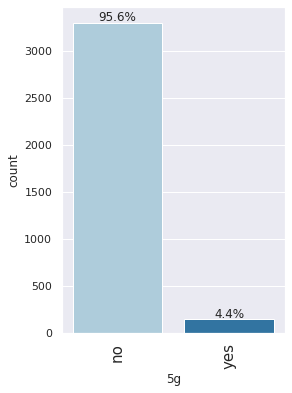

In [ ]:
labeled_barplot(df1, "5g", perc=True)

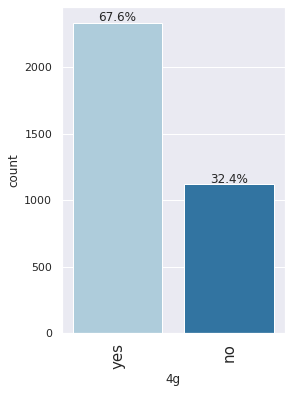

In [ ]:
labeled_barplot(df1, "4g", perc=True)

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           21:03:28   Log-Likelihood:                 123.94
No. Observations:                   2417   AIC:                            -149.9
Df Residuals:                       2368   BIC:                             133.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- The value for adj. R-squared is 0.842, which is really good, meaning the model fits nicely up to a 84%.
- Const coefficient denotes the Y-intercept and indicates that the predicted result (Y) would be equal to the const coefficient if all predictor variable coefficients were zero. 
The const coefficient in this situation is 1.3153.
- A predictor variable's coefficient shows how a change in the predictor causes an alteration in the outcome Y. In this case, the coefficient of for example ram is 0.0229.

## Model Performance Check

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [ ]:
# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
# Function to compute metrics to check performance of regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adj. R-squared": adjr2, "MAPE": mape,},index=[0],)

    return df_perf

In [ ]:
# checking model performance on train set (70% of data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229875,0.180328,0.844898,0.841687,4.327013


In [ ]:
# checking model performance on test set (30% of data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238518,0.184901,0.842268,0.834437,4.506782


- The R-squared in the training set is 0.84, which means that the model is not under-fitting.
- The train and test RMSE and MAE are pretty close to each other, meaning that the model is not over-fitting either.
- MAE suggests that the model can predict prices for used phones within a mean error of 0.18 on the test data.
- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Checking the following Linear Regression assumptions:
1. No Multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity

**Test for Multicollinearity** using **Variance Inflation Factor (VIF)**



**Rules:**
- 1 < VIF > 5 = low multicollinearity
- 5 < VIF > 10 = moderate multicollinearity
- VIF > 10 = high multicollinearity

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]

    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.740568
1,screen_size,7.677259
2,main_camera_mp,2.287784
3,selfie_camera_mp,2.808200
4,int_memory,1.363759
5,ram,2.237586
6,battery,4.081676
7,weight,6.396756
8,days_used,2.660085
9,normalized_new_price,3.117053



- There are a just couple of columns with high VIF values.
- We will drop variables with VIF over 5 one by one, except for the VIF values for dummy variables and the constant (intercept).

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838398,0.234691
1,weight,0.838082,0.234920


In [ ]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,208.979594
1,screen_size,3.592921
2,main_camera_mp,2.191466
3,selfie_camera_mp,2.783621
4,int_memory,1.363624
5,ram,2.235661
6,battery,3.681155
7,days_used,2.648079
8,normalized_new_price,3.113927
9,phone_age,4.725788


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.1
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           23:54:22   Log-Likelihood:                 95.713
No. Observations:                   2417   AIC:                            -95.43
Df Residuals:                       2369   BIC:                             182.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- There is no more multicollinearity.
- adj. R-squared changed from 0.842 to 0.838, meaning that the changes made had no significant impact on the model.

**Dealing with high P-values** by dropping one by one those variables with P-values greater than .05.

In [ ]:
# creating a list of the final variables with p-values under .05 after loops of trials
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'phone_age', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1143.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           00:03:38   Log-Likelihood:                 82.327
No. Observations:                   2417   AIC:                            -140.7
Df Residuals:                       2405   BIC:                            -71.17
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233868,0.183058,0.839463,0.838662,4.389139


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238593,0.185072,0.842168,0.840318,4.503189


- olsmod2 is the final model and x_train3 the final set of features.
- Adj. R-squared is now .839, meaning that the model can explain 84% of the variance.
- There is no sign of over-fitting.

**Tes for Linearity and Independence**

In [ ]:
# creating a df with actual, fitted and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals
df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858858,0.228630
1525,4.448399,4.614027,-0.165627
1128,4.315353,4.277932,0.037421
3003,4.282068,4.251969,0.030099
2907,4.456438,4.439485,0.016953


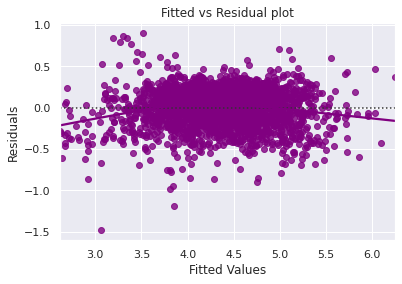

In [ ]:
# plotting the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- By looking at the distribution of residuals vs fitted values, we can conclude that there is no patter. Hence, the assumptions of linearity and independence are satisfied. 

**Tes for Normality**

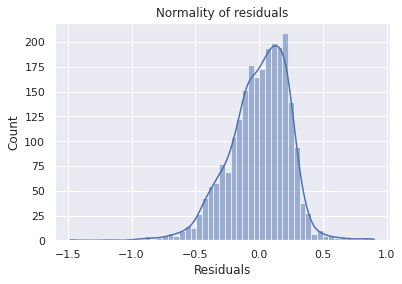

In [ ]:
# looking at the distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The distribution looks somewhat like a bell

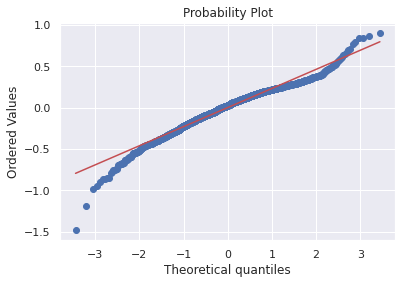

In [ ]:
# Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- Residuals tend to follow the red line, though the tails fall to the sides.

In [ ]:
# Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9725687503814697, pvalue=4.011428536447247e-21)

- The p value is less than .05, meaning that the residuals do not follow a normal distribution.
- Even though the last test failed to prove normality, **we can safely assume by looking at the other tests that the distribution is close to normal.**

**Test for Homoscedasticity**

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0559735892656925), ('p-value', 0.17317063354084397)]

- The p-value is greater than .05, hence the assumption of homoscedasticity is satisfied.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.370221
2341,3.696103,3.954868
1913,3.592093,3.760759
688,4.306495,4.099037
650,4.522115,5.118090
2291,4.259294,4.392332
40,4.997685,5.403853
1884,3.875359,4.103872
2538,4.206631,4.044750
45,5.380450,5.301238


- Looking at the model's perdictions, we can tell that it did a pretty good job getting close to the actual values. 

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
# creating the final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1143.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           01:31:10   Log-Likelihood:                 82.327
No. Observations:                   2417   AIC:                            -140.7
Df Residuals:                       2405   BIC:                            -71.17
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (70% of data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233868,0.183058,0.839463,0.838662,4.389139


In [ ]:
# checking model performance on test set (30% of data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238593,0.185072,0.842168,0.840318,4.503189


- The model can explain 84% of the data variation
- RMSE and MAE values are low and alike, meaning that that the model isn't over-fitting
- We can predict 4.5% of used phones prices
- We can conclude that the final model does a good job at pedicting, and is also good for inference purposes 

## Actionable Insights and Recommendations 

- The model can explain up to 84% of the data variation, and within 4.5% of the prices of used phones on the test data.
- The model is good for prediction as well as inference purposes.
- If the ram of a phone increases by one unit, then its used normilized price increases by 0.0229 units, all other variables held constant.
- If the phone is Xiaomi,  then the price  increases by 0.0857 units, all other variables held constant.
- If the phone's screen increases by one unit,  then the price  increases by 0.0432 units, all other variables held constant.
- If the phone's age increases by one unit, then its price decreases by 0.0179 units, all other variables held constant.
- The prices of phones with 4g availability will be 0.0366 units more than those with 5g availability.
- Newer phones are more attractive and cost more even if they're used. Due to this, the company could focus on acquiring the lattest models available, achieving rapid sales and more profitable as well.
- As the screen size of a phone increases, so those the price. Because of this, the company could focus on acquiring phones with larger screens and standirize the minimum size. Samsung and Apple devices tend to have bigger screens.
- Battery has also a positive impact on price as it goes up. The company could focus on adquiring phones from Apple and Samsung, which tend to offer better devices when it comes to battery life.



___